# Week 4: Grouping & Sorting
In last week's tutorial, we learned how to apply functions to a series within a dataframe. However, sometimes we might only want to consider a particular subset or group of a specific column. This is where grouping and sorting comes in. 
Segmentation is a really powerful way to extract insights about a particular group within our dataset e.g. customer age groups, geographic location, types of products etc. It allows us to break down a big piece of data into smaller, more manageable# 
components. That way we can more easily analyse and identify the key features and patterns about that particular segment. In this week's tutorial, we are going to look at some of the techniques that you can use to group and sort your data that will take your data analysis to the next level.

## Import pandas 

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("titanic/train.csv")
data.head()

In [107]:
# Analysis of used data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [108]:
# We can convert a column of one type into another using the astype function
data['Fare'].astype('int64')

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int64


## Analysing missing values
How many null values are there in our dataframe?

In [121]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

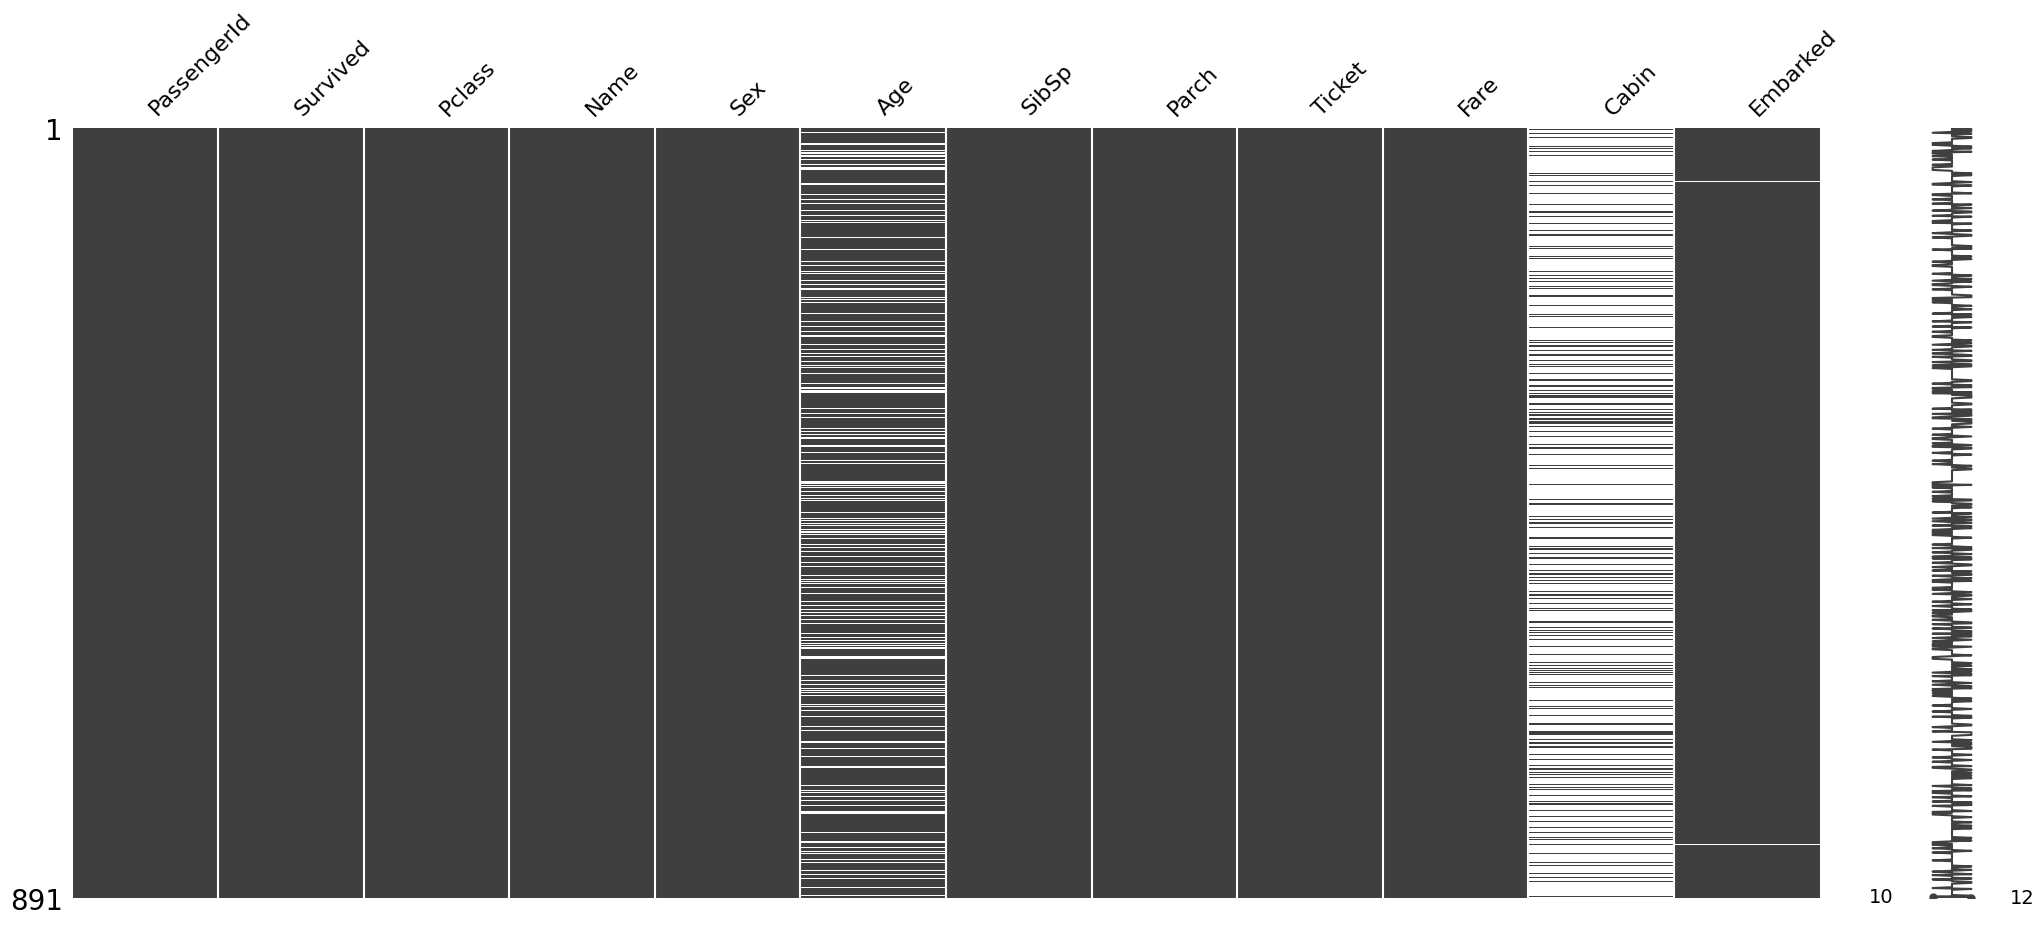

In [122]:
# Alternative for showing missing values
# Import missingno library
import missingno
# Visualise null values
missingno.matrix(data)

## Groupwise analysis

In [109]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [110]:
# Sum of all passengers
data['Embarked'].value_counts().sum()

889

In [124]:
data.groupby(['Embarked']).size()

Embarked
C    168
Q     77
S    644
dtype: int64

There are other functions other than count that you can apply to a group. We have covered them in our tutorial last week, for example, sum, min, max, mean etc.

In [125]:
# What are the total numbers of passenger for each Passenger class?
data.groupby(['Pclass']).size()

Pclass
1    216
2    184
3    491
dtype: int64

Suppose we would like to compute a bunch of different functions to group simultaneously. The way we do that is via the [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) function.

Let's work out the average, minimum and maximum number of victims for each month.

In [113]:
# Calculating the average and sum of the fares
data['Fare'].agg(['sum', 'mean'])

sum     28693.949300
mean       32.204208
Name: Fare, dtype: float64

In [114]:
# Using agg functions together with group by, thus creating some descriptive statistics
agg_func_describe = {'Fare': ['describe']}
data.groupby(['Embarked']).agg(agg_func_describe).round(2)



Fare                                                
         describe                                                
            count   mean    std   min    25%    50%   75%     max
Embarked                                                         
C           168.0  59.95  83.91  4.01  13.70  29.70  78.5  512.33
Q            77.0  13.28  14.19  6.75   7.75   7.75  15.5   90.00
S           644.0  27.08  35.89  0.00   8.05  13.00  27.9  263.00

## Sorting

We can sort a series in ascending or descending order via the [sort values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) function.

In [115]:
# Sum of Fares of each Pclass sorted from lowest to highest
# Pclass 1 = First class passengers were the wealthiest on board, and were mostly business men or politicians
# Pclass 2 = Second class were often professors or authors 
# Pclass 3 = was made up of primarily immigrants 
data.groupby('Pclass')['Fare'].mean().sort_values(ascending=True)

Pclass
3    13.675550
2    20.662183
1    84.154687
Name: Fare, dtype: float64

In [117]:
# Max fare for each embarkment harbour (from highest to lowest)
data.groupby('Embarked')['Fare'].max().sort_values(ascending=False)

Embarked
C    512.3292
S    263.0000
Q     90.0000
Name: Fare, dtype: float64

In [118]:
# Min fare for each embarkment harbour (from highest to lowest)
data.groupby('Embarked')['Fare'].min().sort_values(ascending=False)

Embarked
Q    6.7500
C    4.0125
S    0.0000
Name: Fare, dtype: float64